#### 1. Load DataSet

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/bike/train.csv',\
                    parse_dates=['datetime'])

In [3]:
print(train.shape)
print(train.columns)
print(train.info())
train.head()

(10886, 12)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv('data/bike/test.csv',\
                    parse_dates=['datetime'])

In [7]:
print(test.shape)
print(test.columns)
print(test.info())
test.head()

(6493, 9)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
%time train['season'].value_counts()

Wall time: 2 ms


4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [10]:
%time train.groupby('season')['count'].count()

Wall time: 3 ms


season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

In [12]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [15]:
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [18]:
train['windspeed'].value_counts().head(10)

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
Name: windspeed, dtype: int64

In [19]:
# combine train and test dataset
train_test_data = [train, test]

In [24]:
#시계열 데이터를 년/월/일/시/분/초/요일 로 분리해서
#새로운 컬럼 생성
for data in train_test_data:
    data['datetime-year'] = data['datetime'].dt.year
    data['datetime-month'] = data['datetime'].dt.month
    data['datetime-day'] = data['datetime'].dt.day
    data['datetime-hour'] = data['datetime'].dt.hour
    data['datetime-minute'] = data['datetime'].dt.minute
    data['datetime-second'] = data['datetime'].dt.second
    data['datetime-dayofweek'] = data['datetime'].dt.dayofweek

In [25]:
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')


In [27]:
col_list = ['datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek']
for data in train_test_data:
    for col in col_list:
        print(col)
        print(data[col].value_counts())

datetime-year
2012    5464
2011    5422
Name: datetime-year, dtype: int64
datetime-month
7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: datetime-month, dtype: int64
datetime-day
1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: datetime-day, dtype: int64
datetime-hour
23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime-hour, dtype: int64
datetime-minute
0    10886
Name: datetime-minute, dtype: int64
datetime-second
0    10886
Name: datetime-second, dtype: int64
datetime-dayofweek
5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: datetime-da

### 2. Visualization

In [28]:
%matplotlib inline

import seaborn as sns

#### 2.1 countplot 
* x,y 축을 동시에 지정할 수 없고, x 나 y축 하나만 사용가능

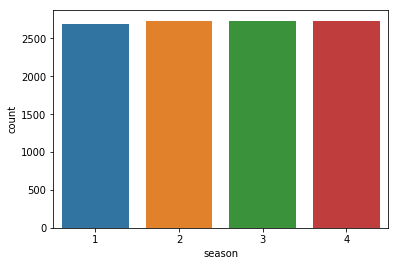

In [29]:
sns.countplot(data=train, x='season')

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


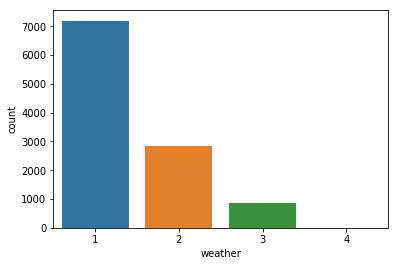

In [32]:
print(train['weather'].value_counts())
sns.countplot(data=train, x='weather')

#### 2.2 barplot
* barplot은 x, y 축 값을 모두 지정할 수 있다.

In [34]:
import matplotlib.pyplot as plt

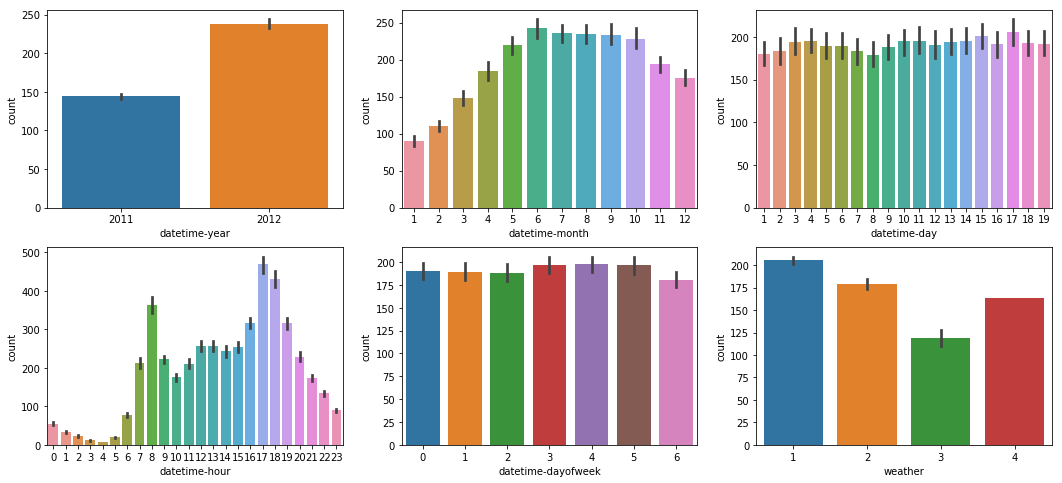

In [44]:
# 1 figure에 6개의 axes를 그리기
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = \
plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='datetime-year',y='count',ax=ax1)
sns.barplot(data=train, x='datetime-month',y='count',ax=ax2)
sns.barplot(data=train, x='datetime-day',y='count',ax=ax3)
sns.barplot(data=train, x='datetime-hour',y='count',ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek',y='count',ax=ax5)
sns.barplot(data=train, x='weather',y='count',ax=ax6)

In [47]:
#datetime-year 와 datetime-month 컬럼을 합친
#datetime-year-month 새로운 컬럼을 생성
train['datetime-year-month'] = \
train['datetime-year'].astype(str) + '-' + \
train['datetime-month'].astype(str)
train.loc[:,['datetime-year', 'datetime-month','datetime-year-month']].head()

,datetime-year,datetime-month,datetime-year-month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


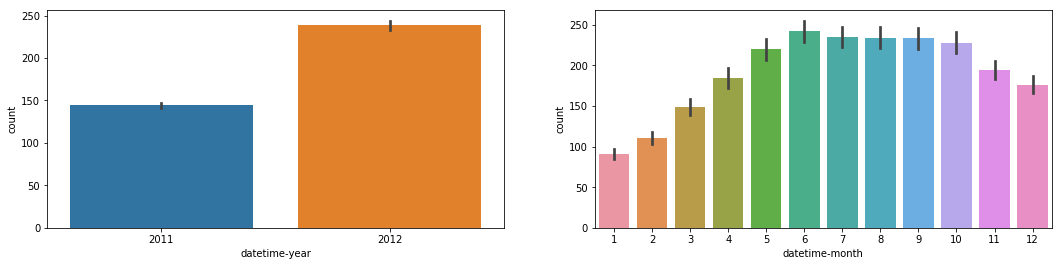

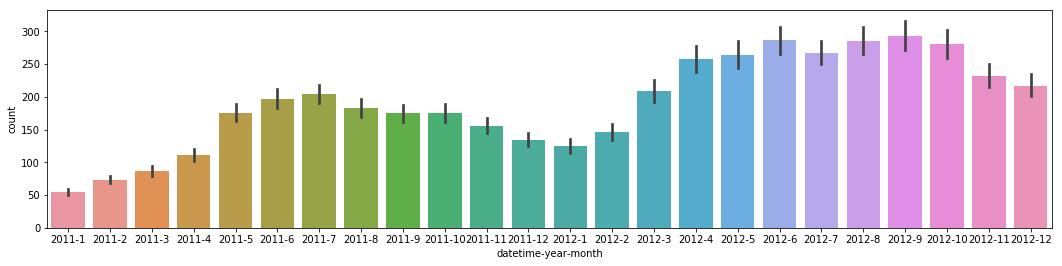

In [49]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year',y='count',ax=ax1)
sns.barplot(data=train, x='datetime-month',y='count',ax=ax2)

figure, ax1 = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year-month',y='count',ax=ax1)

#### 3. pointplot (line graph)

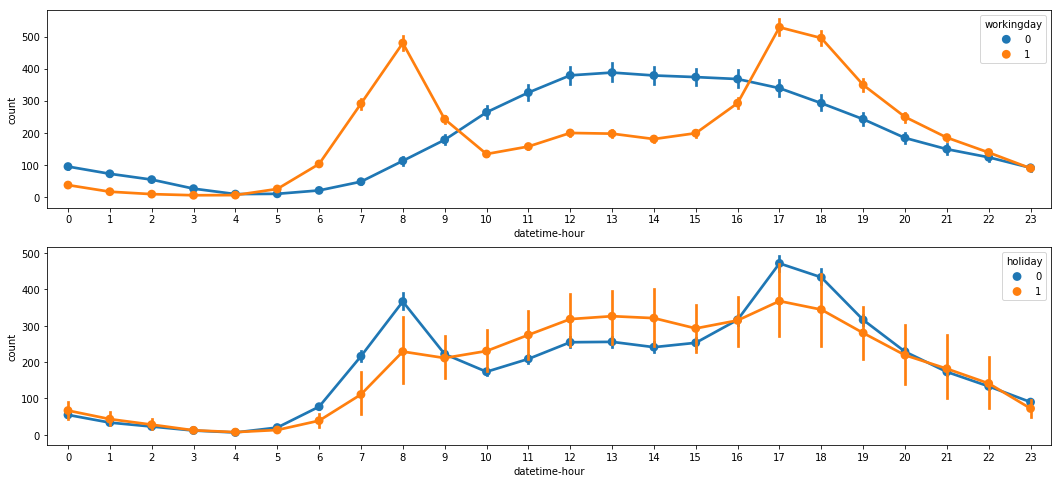

In [52]:
figure, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,8)
sns.pointplot(data=train, x='datetime-hour',y='count',ax=ax1, \
             hue='workingday')
sns.pointplot(data=train, x='datetime-hour',y='count',ax=ax2, \
             hue='holiday')

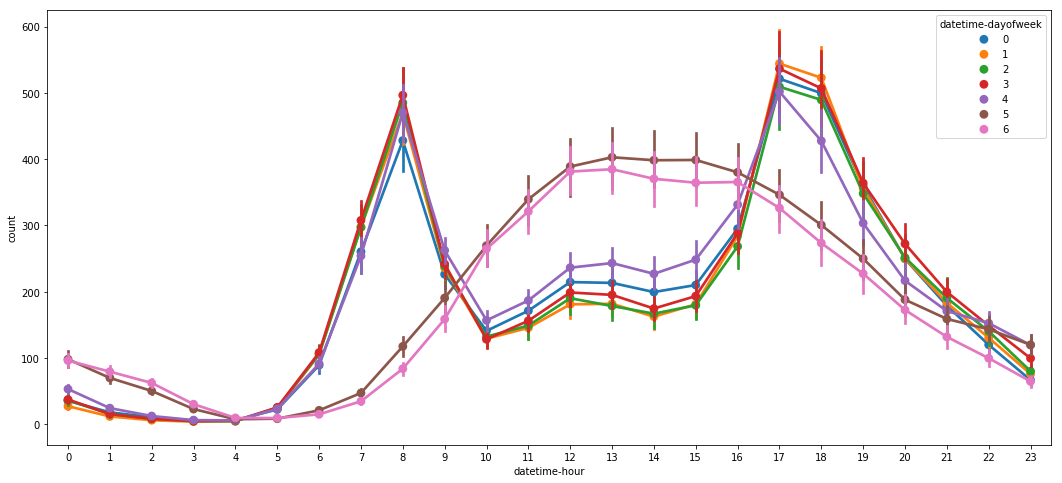

In [53]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,8)
sns.pointplot(data=train, x='datetime-hour',y='count',ax=ax1, \
             hue='datetime-dayofweek')

#### 4. distplot(분포도)

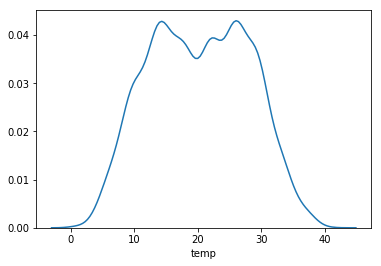

In [54]:
sns.distplot(train['temp'], hist=False)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


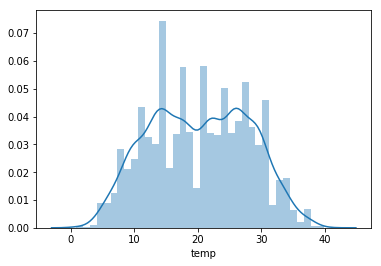

In [56]:
sns.distplot(train['temp'], hist=True)

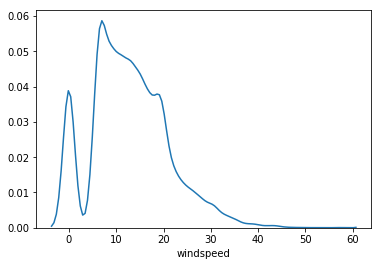

In [57]:
sns.distplot(train['windspeed'], hist=False)

#### 3. Train & Predict

##### 3.1 One hot encoding
* 해당 요일은 1 (True), 나머지 요일은 0(False)로 표시하는 방법

In [59]:
for data in train_test_data:
    data['datetime-monday'] = data['datetime-dayofweek'] == 0
    data['datetime-tuesday'] = data['datetime-dayofweek'] == 1
    data['datetime-wednesday'] = data['datetime-dayofweek'] == 2
    data['datetime-thursday'] = data['datetime-dayofweek'] == 3
    data['datetime-friday'] = data['datetime-dayofweek'] == 4
    data['datetime-saturday'] = data['datetime-dayofweek'] == 5
    data['datetime-sunday'] = data['datetime-dayofweek'] == 6

In [60]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month', 'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday'],
      dtype='object')

In [62]:
train.loc[:, ['datetime-dayofweek',
        'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday']].tail()

,datetime-dayofweek,datetime-monday,datetime-tuesday,datetime-wednesday,datetime-thursday,datetime-friday,datetime-saturday,datetime-sunday
10881,2,False,False,True,False,False,False,False
10882,2,False,False,True,False,False,False,False
10883,2,False,False,True,False,False,False,False
10884,2,False,False,True,False,False,False,False
10885,2,False,False,True,False,False,False,False


In [64]:
test.loc[:, ['datetime-dayofweek',
        'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday']].tail()

,datetime-dayofweek,datetime-monday,datetime-tuesday,datetime-wednesday,datetime-thursday,datetime-friday,datetime-saturday,datetime-sunday
6488,0,True,False,False,False,False,False,False
6489,0,True,False,False,False,False,False,False
6490,0,True,False,False,False,False,False,False
6491,0,True,False,False,False,False,False,False
6492,0,True,False,False,False,False,False,False


In [65]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month', 'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday'],
      dtype='object')

In [93]:
feature_names_1 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','datetime-year','datetime-hour','datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday']
feature_names_2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','datetime-year','datetime-month','datetime-hour','datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday']
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','datetime-year','datetime-hour','datetime-dayofweek']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [94]:
#훈련데이터 (X_train) 생성
X_train = train[feature_names]
print(X_train.shape)
print(X_train.isnull().sum())
print(X_train.dtypes)
X_train.head()

(10886, 11)
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
datetime-year         0
datetime-hour         0
datetime-dayofweek    0
dtype: int64
season                  int64
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
datetime-year           int64
datetime-hour           int64
datetime-dayofweek      int64
dtype: object


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [95]:
#훈련데이터 레이블 생성
y_train = train['count']
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [96]:
#테스트데이터 (X_test) 생성
X_test = test[feature_names]
print(X_test.shape)
print(X_test.isnull().sum())
print(X_test.dtypes)
X_test.head()

(6493, 11)
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
datetime-year         0
datetime-hour         0
datetime-dayofweek    0
dtype: int64
season                  int64
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
datetime-year           int64
datetime-hour           int64
datetime-dayofweek      int64
dtype: object


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


#### 3.2 Random Forest 알고리즘 사용

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model = RandomForestRegressor(random_state=42, \
                              n_estimators=3000,\
                              max_depth= 83,\
                              max_features=0.851358)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
#학습하기
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [106]:
#예측하기
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([ 11.946     ,   5.149     ,   3.87222222, ..., 102.03319444,
       100.445     ,  48.16631667])

#### 4. Submission (제출)

In [107]:
submit = pd.read_csv('data/bike/sampleSubmission.csv')
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [108]:
# 예측한 값(predictions)을 count 컬럼에 대입한다.
submit['count'] = predictions
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.946000
1,2011-01-20 01:00:00,5.149000
2,2011-01-20 02:00:00,3.872222
3,2011-01-20 03:00:00,3.576333
4,2011-01-20 04:00:00,2.974667


In [109]:
#submit dataframe을 제출할 csv 파일로 write
submit.to_csv('data/bike/bike_04.csv', index=False)

In [ ]:
#0.42682 (month 없고, one hot encoding 함)
#0.47479 (month 있고, one hot encoding 함)
#0.42540 (month 없고, one hot encoding 않함)
0.42115